# Проект: Обучение с учителем: качество модели.

#### Описание проекта  
  
  Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

#### Цель проекта:  
  
  Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

#### Описание данных  
  
**market_file.csv**  
  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
  
- id — номер покупателя в корпоративной базе данных.  
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».  
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».  
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.  
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.  
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.  
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.  
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.  
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.  
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.  
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.  
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  
  
**market_money.csv**  
  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
  
- id — номер покупателя в корпоративной базе данных.  
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
- Выручка — сумма выручки за период.  
  
**market_time.csv**  
  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.  
  
- id — номер покупателя в корпоративной базе данных.  
- Период — название периода, во время которого зафиксировано общее время.  
- минут — значение времени, проведённого на сайте, в минутах.  

**money.csv**  
  
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  
  
- id — номер покупателя в корпоративной базе данных.  
- Прибыль — значение прибыли.  

#### План выполнения проекта:  
  
1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

In [ ]:
!pip install shap -q
!pip install scikit-learn==1.6.1 -q
import shap
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV
    )
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    LabelEncoder
    )
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score
    )
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка и изучение данных

In [ ]:
market = pd.read_csv('/datasets/market_file.csv')
market.info()
market.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [ ]:
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.info()
market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [ ]:
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.info()
market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [ ]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод:**   
- Пропуски в таблицах отсутствуют.  
- Типы данных в столбцах соответствуют их наполнению.  
- Названия столбцов не везде имеют одинаковый вид в соответствии со "змеиным регистром".

## Предобработка данных

### Переименование столбцов

In [ ]:
market.columns = market.columns.str.lower().str.replace(' ', '_')
market_time.columns = market_time.columns.str.lower().str.replace(' ', '_')
market_money.columns = market_money.columns.str.lower().str.replace(' ', '_')
money.columns = money.columns.str.lower().str.replace(' ', '_')

print(f'{market.columns}, {market_time.columns}, {market_money.columns}, {money.columns}')


Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object'), Index(['id', 'период', 'минут'], dtype='object'), Index(['id', 'период', 'выручка'], dtype='object'), Index(['id', 'прибыль'], dtype='object')


### Обработка дубликатов

In [ ]:
display(market.duplicated().value_counts())
display(market_money.duplicated().value_counts())
display(market_time.duplicated().value_counts())
money.duplicated().value_counts()

False    1300
dtype: int64

False    3900
dtype: int64

False    2600
dtype: int64

False    1300
dtype: int64

Полных дубликатов нет.

In [ ]:
display(market['покупательская_активность'].unique())
display(market['тип_сервиса'].unique())
display(market['популярная_категория'].unique())
display(market_money['период'].unique())
market_time['период'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [ ]:
market.loc[market['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'
market.loc[market['популярная_категория'] == 'Косметика и аксесуары', 'популярная_категория'] = 'Косметика и аксессуары'
market_time.loc[market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'

display(market['тип_сервиса'].unique())
display(market['популярная_категория'].unique())
market_time['период'].unique()

array(['премиум', 'стандарт'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксессуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

**Вывод:**  
- Полных дубликатов нет.
- Найден и исправлен неявный дубликат.  
- Исправлены 2 опечатки в названиях категорий.

## Исследовательский анализ данных

In [ ]:
#напишем функцию простроения гистограммы и "ящика с усами" для количественных признаков
def describe_hist_boxplot(df):

    for column in df.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:

        display(Markdown(f"<center><strong>{column}</strong></center>"))
        display(df[column].describe().round(2))

        sns.set(rc={"figure.figsize": (20, 5)}, style="whitegrid")
        fig, axes = plt.subplots(1, 2)

        stat, p_value = stats.shapiro(df[column].dropna())
        norm = "нормальное" if p_value > 0.05 else "ненормальное"

        #добавим условие для определения является ли функция дискретной и построим графики в соответствии с условием
        if df[column].nunique() <= 10:
            #используем countplot
            sns.countplot(
                x=column,
                data=df,
                ax=axes[0],
                color='olive',
                edgecolor='black',
                linewidth=1.2
            )
            axes[0].set(
                ylabel='Количество',
                xlabel=column,
                title=f'Распределение дискретного признака {column}'
            )

        else:
            #используем histplot
            sns.histplot(
                df[column],
                bins=20,
                ax=axes[0],
                color='olive',
                edgecolor='black',
                linewidth=1.2
            )
            axes[0].set(
                ylabel='Частота',
                xlabel=column,
                title=f'Распределение непрерывного признака {column}'
            )

        box = sns.boxplot(
                          df[column],
                          ax=axes[1],
                          color='olive',
                          linewidth=2,
                          flierprops={
                                      'markerfacecolor': 'olive',
                                      'markeredgecolor': 'black',
                                      'markersize': 8
                                      }
                         )

        axes[1].set(ylabel=column, title=f'Boxplot для {column}')

        for ax in axes:
            ax.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        display(Markdown(f"**p-value** = {p_value}, следовательно распределение **{norm}**"))

In [ ]:
#напишем функцию для построения круговых диаграмм для категориальных признаков
def pie_chart(df):

    OLIVE_PALETTE = [
        '#808000',  # основной оливковый
        '#556B2F',  # тёмно-оливковый
        '#6B8E23',  # olivedrab
        '#BDB76B',  # darkkhaki
        '#9ACD32',  # yellowgreen
        '#F0E68C',  # khaki (светлый)
        '#8FBC8F',  # darkseagreen
    ]

    for column in df.select_dtypes(include='object').columns.tolist():

        value_counts = df[column].value_counts()

        display(Markdown(f"<center><strong>{column}</strong></center>"))

        plt.figure(figsize=(5, 5))

        wedges, texts, autotexts = plt.pie(
            value_counts,
            autopct='%1.1f%%',
            startangle=90,
            colors=OLIVE_PALETTE,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
            textprops={'fontsize': 12}
        )

        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_weight('bold')
            autotext.set_fontsize(12)

        plt.legend(
            wedges,
            value_counts.index,
            title="Категории",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1),
            fontsize=12
        )

        plt.show()

### Выбор активных в последние 3 месяца покупателей

In [ ]:
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [ ]:
market = market.query('id != [215348, 215357, 215359]').reset_index(drop=True)
market_money = market_money.query('id != [215348, 215357, 215359]').reset_index(drop=True)
market_time = market_time.query('id != [215348, 215357, 215359]').reset_index(drop=True)
money = money.query('id != [215348, 215357, 215359]').reset_index(drop=True)

### market_file

<center><strong>маркет_актив_6_мес</strong></center>

count    1297.00
mean        4.25
std         1.02
min         0.90
25%         3.70
50%         4.20
75%         4.90
max         6.60
Name: маркет_актив_6_мес, dtype: float64

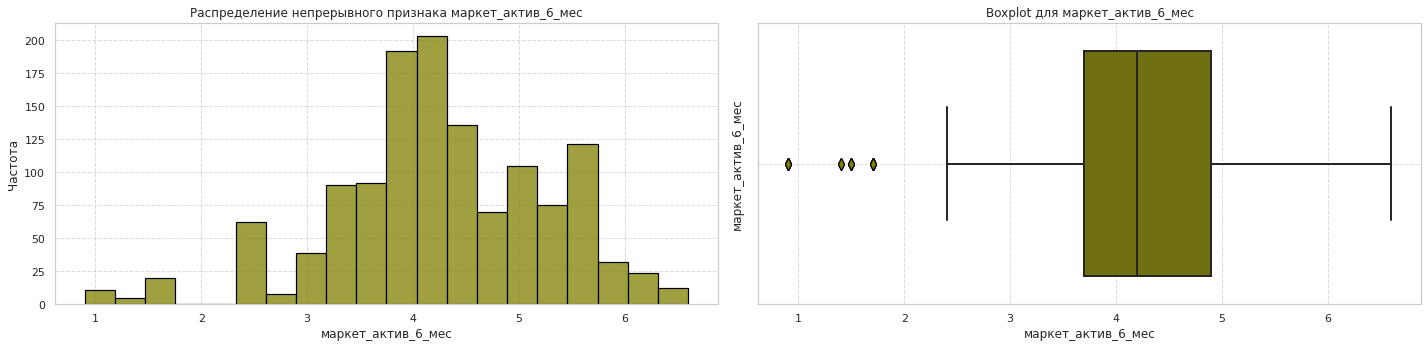

**p-value** = 3.334970645994806e-13, следовательно распределение **ненормальное**

<center><strong>маркет_актив_тек_мес</strong></center>

count    1297.00
mean        4.01
std         0.70
min         3.00
25%         4.00
50%         4.00
75%         4.00
max         5.00
Name: маркет_актив_тек_мес, dtype: float64

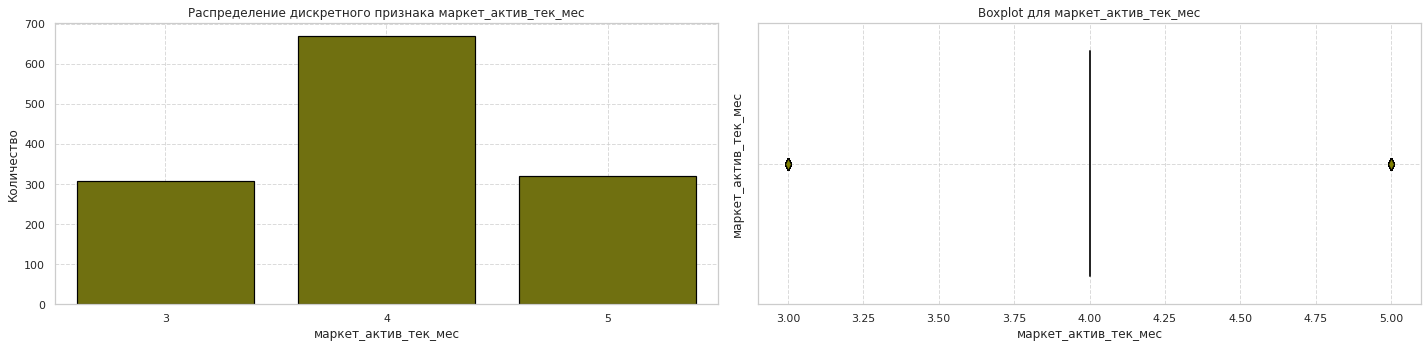

**p-value** = 7.828221812583313e-37, следовательно распределение **ненормальное**

<center><strong>длительность</strong></center>

count    1297.00
mean      602.99
std       249.10
min       121.00
25%       410.00
50%       607.00
75%       806.00
max      1079.00
Name: длительность, dtype: float64

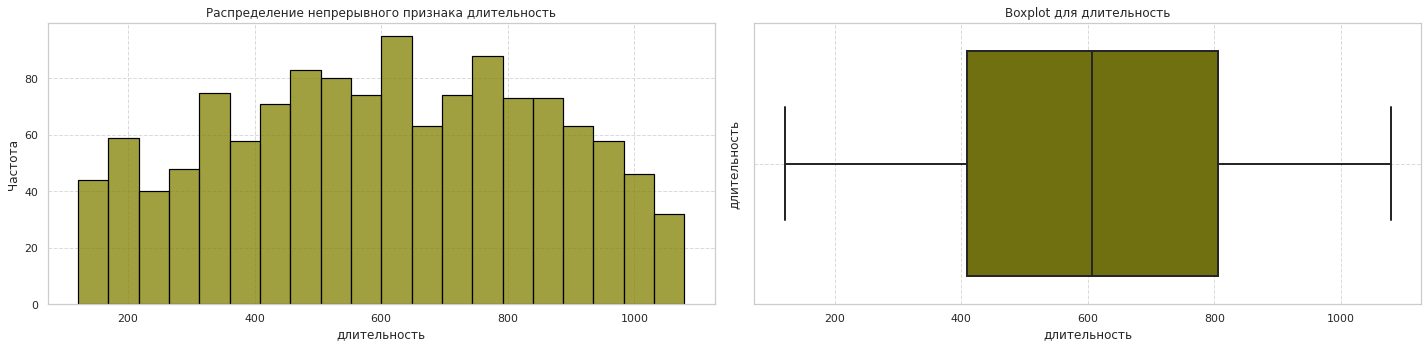

**p-value** = 6.022633377390308e-15, следовательно распределение **ненормальное**

<center><strong>акционные_покупки</strong></center>

count    1297.00
mean        0.32
std         0.25
min         0.11
25%         0.17
50%         0.24
75%         0.30
max         0.99
Name: акционные_покупки, dtype: float64

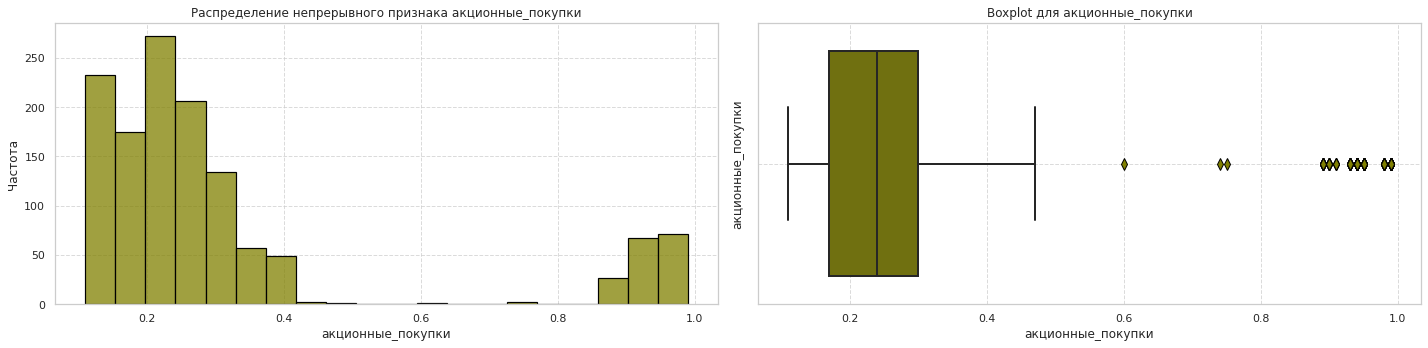

**p-value** = 4.203895392974451e-45, следовательно распределение **ненормальное**

<center><strong>средний_просмотр_категорий_за_визит</strong></center>

count    1297.00
mean        3.27
std         1.35
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         6.00
Name: средний_просмотр_категорий_за_визит, dtype: float64

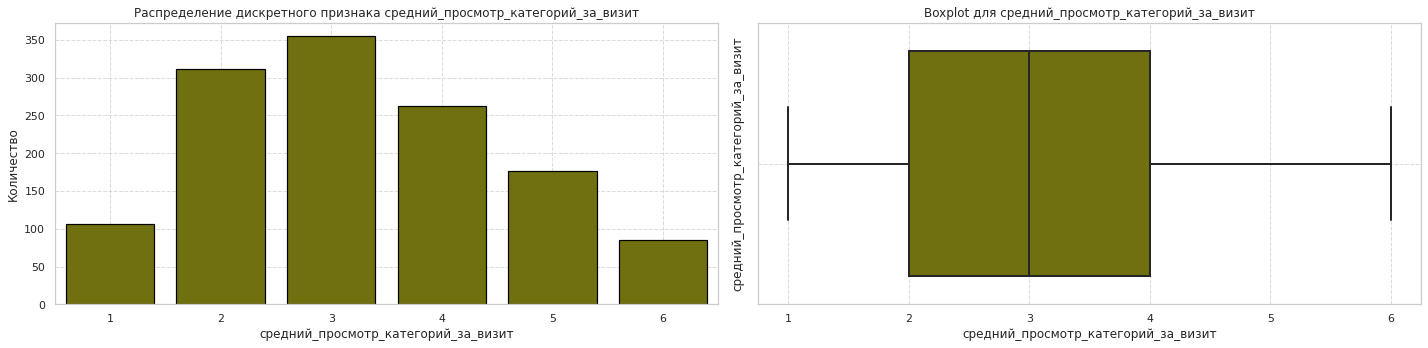

**p-value** = 4.569419995507535e-24, следовательно распределение **ненормальное**

<center><strong>неоплаченные_продукты_штук_квартал</strong></center>

count    1297.00
mean        2.84
std         1.97
min         0.00
25%         1.00
50%         3.00
75%         4.00
max        10.00
Name: неоплаченные_продукты_штук_квартал, dtype: float64

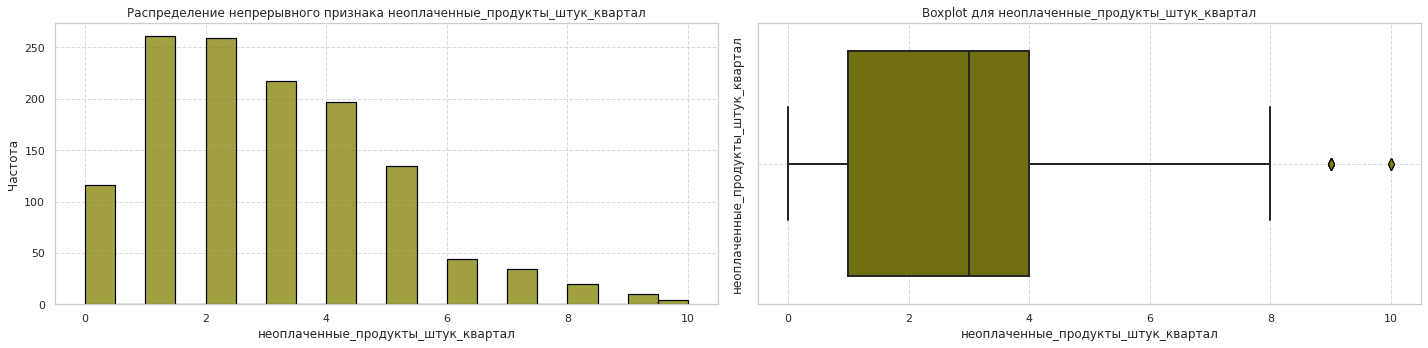

**p-value** = 1.1098016281037619e-23, следовательно распределение **ненормальное**

<center><strong>ошибка_сервиса</strong></center>

count    1297.00
mean        4.18
std         1.95
min         0.00
25%         3.00
50%         4.00
75%         6.00
max         9.00
Name: ошибка_сервиса, dtype: float64

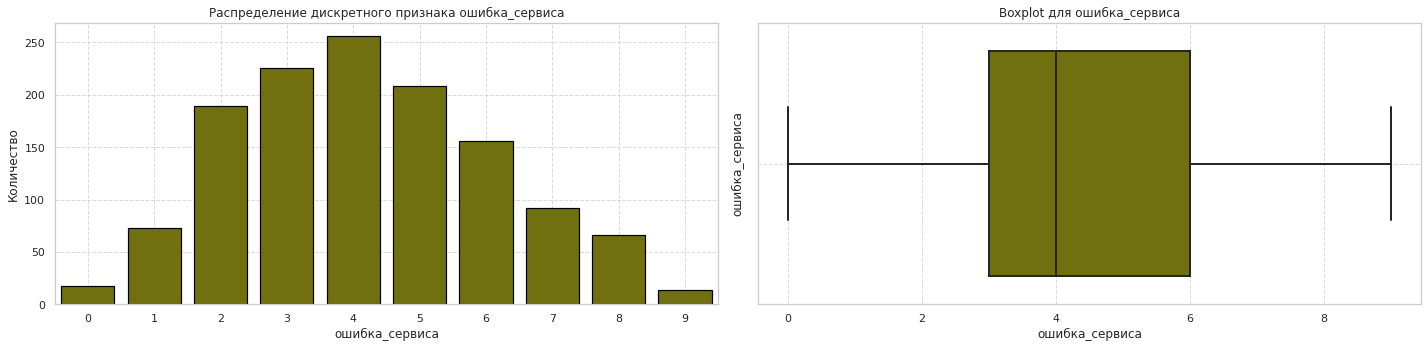

**p-value** = 6.413092907943201e-17, следовательно распределение **ненормальное**

<center><strong>страниц_за_визит</strong></center>

count    1297.00
mean        8.19
std         3.98
min         1.00
25%         5.00
50%         8.00
75%        11.00
max        20.00
Name: страниц_за_визит, dtype: float64

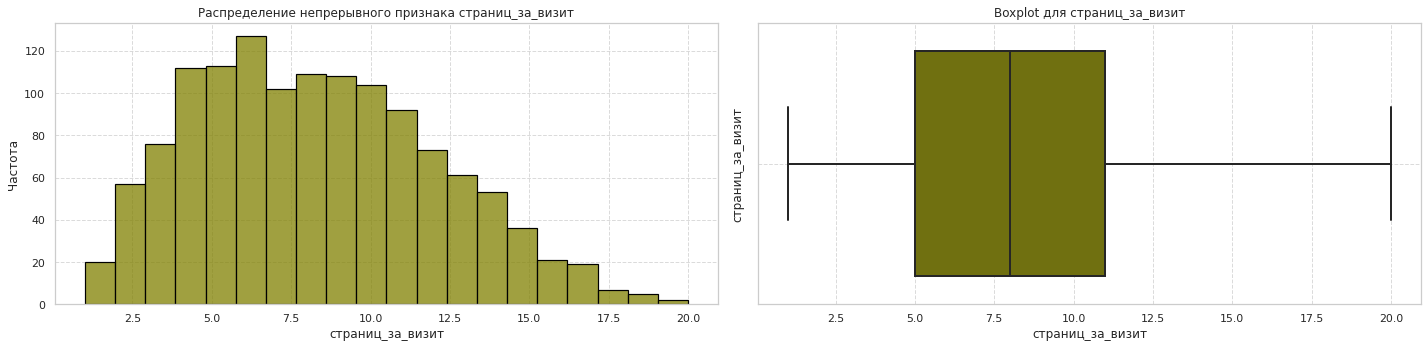

**p-value** = 1.535947035519441e-14, следовательно распределение **ненормальное**

<center><strong>покупательская_активность</strong></center>

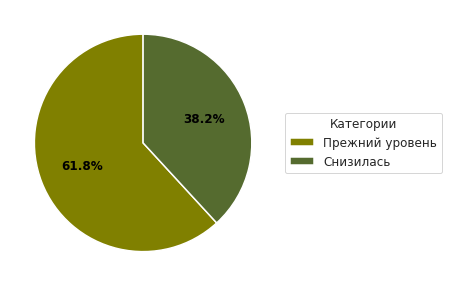

<center><strong>тип_сервиса</strong></center>

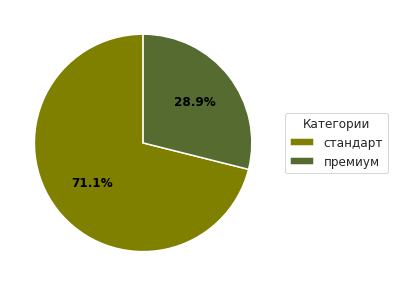

<center><strong>разрешить_сообщать</strong></center>

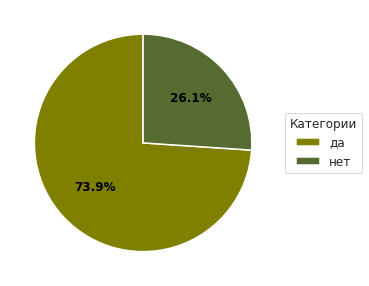

<center><strong>популярная_категория</strong></center>

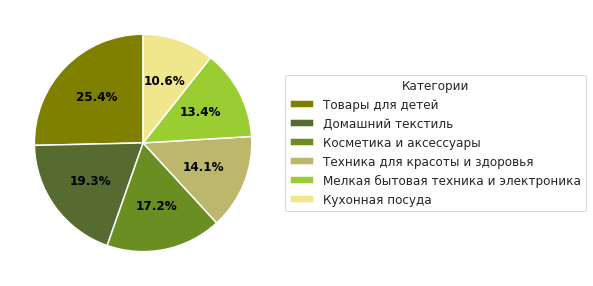

In [ ]:
describe_hist_boxplot(market)
pie_chart(market)

- **Маркет_актив_6 мес** имеет ненормальное распределение, есть небольшая группа малых значений;
- **Маркет_актив_тек_мес** выглядит как категориальный признак;
- **Длительность** имеет ненормальное распределение;
- **Акционные_покупки** имеет бимодальное распределение - в области от 0 до 0,4 и в области от 0,8 до 1. Так же можно заметить, что сущетвуют покупатели, которые покупают только оп акции;
- **Средний_просмотр_категорий_за_визит** имеет ненормальное распределение;
- **Неоплаченные_продукты_штук_квартал** имеет смещенное влево ненормальное распределение;
- **Ошибки_сервиса** имеет ненормальное распределение;
- **Страниц_за_визит** имеет смещенное влево ненормальное распределение;
- Категорианальные признаки несбалансированы.

### market_money

<center><strong>выручка</strong></center>

count      3891.00
mean       5033.72
std        1768.47
min        2758.70
25%        4592.00
50%        4959.00
75%        5363.20
max      106862.20
Name: выручка, dtype: float64

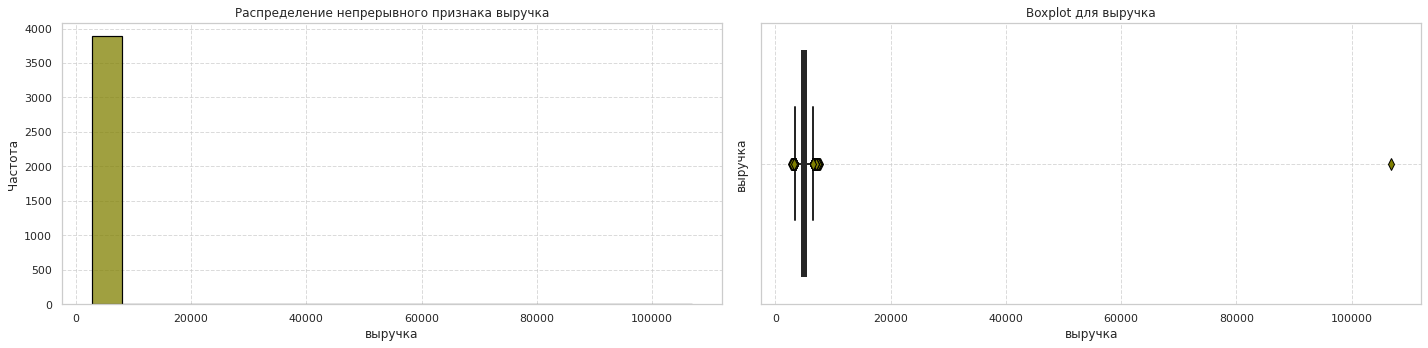

**p-value** = 0.0, следовательно распределение **ненормальное**

In [ ]:
describe_hist_boxplot(market_money)

Присутствуют аномальные значения найдем их и обработаем.

In [ ]:
market_money.sort_values('выручка', ascending=False)

,id,период,выручка
89,215380,текущий_месяц,106862.2
426,215493,текущий_месяц,7799.4
253,215435,текущий_месяц,7605.3
1472,215841,текущий_месяц,7557.0
2379,216144,текущий_месяц,7547.8
...,...,...,...
383,215478,предыдущий_месяц,2960.0
2476,216176,текущий_месяц,2952.2
653,215568,предыдущий_месяц,2909.0
640,215564,предыдущий_месяц,2890.0


In [ ]:
market = market.query('id != [215380]').reset_index(drop=True)
market_money = market_money.query('id != [215380]').reset_index(drop=True)
market_time = market_time.query('id != [215380]').reset_index(drop=True)
money = money.query('id != [215380]').reset_index(drop=True)

<center><strong>выручка</strong></center>

count    3888.00
mean     5007.26
std       679.19
min      2758.70
25%      4591.95
50%      4959.00
75%      5363.00
max      7799.40
Name: выручка, dtype: float64

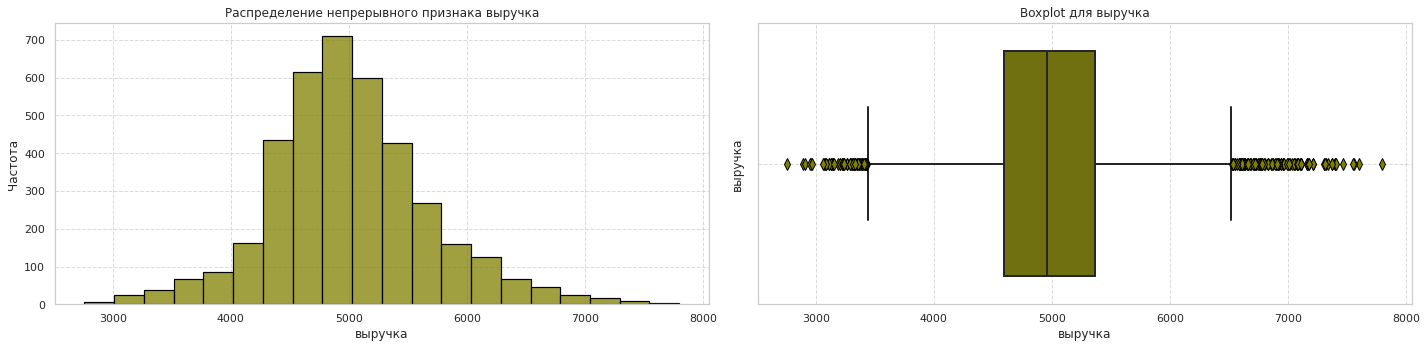

**p-value** = 4.950719889905073e-22, следовательно распределение **ненормальное**

In [ ]:
describe_hist_boxplot(market_money)

- **Выручка** имееет ненормальное распределение, аномальное значение удалено;

### market_time

<center><strong>минут</strong></center>

count    2592.00
mean       13.34
std         4.08
min         4.00
25%        10.00
50%        13.00
75%        16.00
max        23.00
Name: минут, dtype: float64

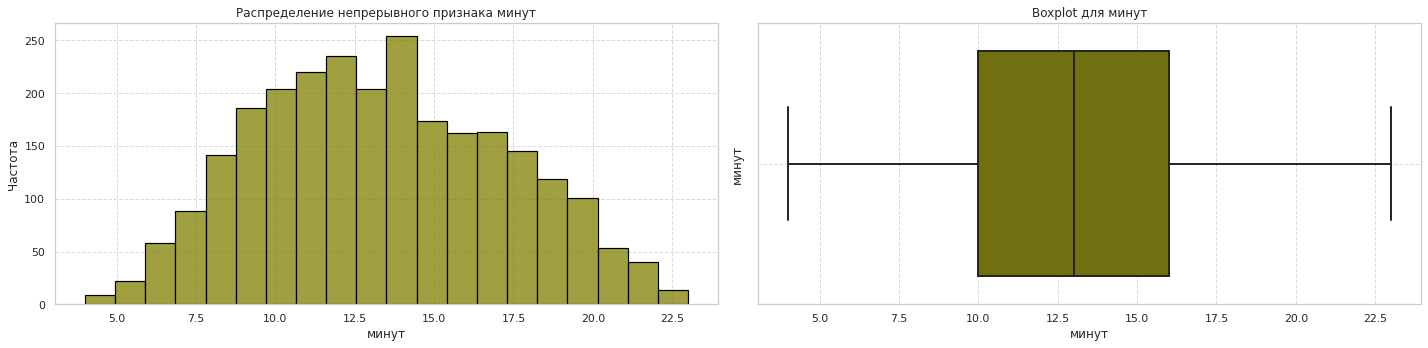

**p-value** = 2.378017371583989e-17, следовательно распределение **ненормальное**

In [ ]:
describe_hist_boxplot(market_time)

- **Минут** имеет ненормальное распределение, смещенное влево;

### money

<center><strong>прибыль</strong></center>

count    1296.00
mean        4.00
std         1.01
min         0.86
25%         3.30
50%         4.04
75%         4.67
max         7.43
Name: прибыль, dtype: float64

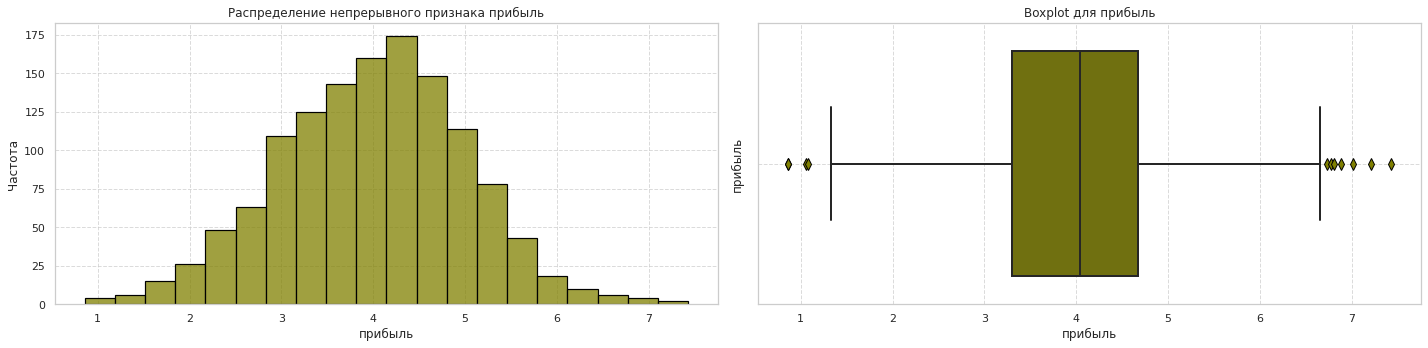

**p-value** = 0.34479060769081116, следовательно распределение **нормальное**

In [ ]:
describe_hist_boxplot(money)

- **Прибыль** имееет ненормальное распределение, смещенное вправо;

### Вывод:  
  
  Отобрали активных последние 3 месяца пользователей.
  
  Анализ датафреймов показал следующее:  
  
**market_file:**  
  - **Маркет_актив_6 мес** имеет ненормальное распределение, есть небольшая группа малых значений;
  - **Маркет_актив_тек_мес** выглядит как категориальный признак;
  - **Длительность** имеет ненормальное распределение;
  - **Акционные_покупки** имеет бимодальное распределение - в области от 0 до 0,4 и в области от 0,8 до 1. Так же можно заметить, что сущетвуют покупатели, которые покупают только оп акции;
  - **Средний_просмотр_категорий_за_визит** имеет ненормальное распределение;
  - **Неоплаченные_продукты_штук_квартал** имеет смещенное влево ненормальное распределение;
  - **Ошибки_сервиса** имеет ненормальное распределение;
  - **Страниц_за_визит** имеет смещенное влево ненормальное распределение;
  - Категорианальные признаки несбалансированы.  
  
**market_money**  
  - **Выручка** имееет ненормальное распределение, аномальное значение удалено;
  
**market_time**  
  - **Минут** имеет неормальное распределение, смещенное влево;
  
**money**  
  - **Прибыль** имееет ненормальное распределение, смещенное вправо;
  
  

## Объединение таблиц

In [ ]:
market_united = market.copy()

for name in market_money['период'].unique().tolist():
    market_united = market_united.merge(market_money[market_money['период'] == name].drop(columns='период'),
                          on='id',
                          how='left',
                          suffixes=('_препред_мес', '_пред_мес'))

for name in market_time['период'].unique().tolist():
    market_united = market_united.merge(market_time[market_time['период'] == name].drop(columns='период'),
                          on='id',
                          how='left',
                          suffixes=('_пред_мес', '_тек_мес'))

market_united.set_index('id')
market_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

**Вывод:**  
  - Объединили таблицы по общему признаку;
  - Добавили дополнительные колонки для значений за разные периоды.

## Корреляционный анализ

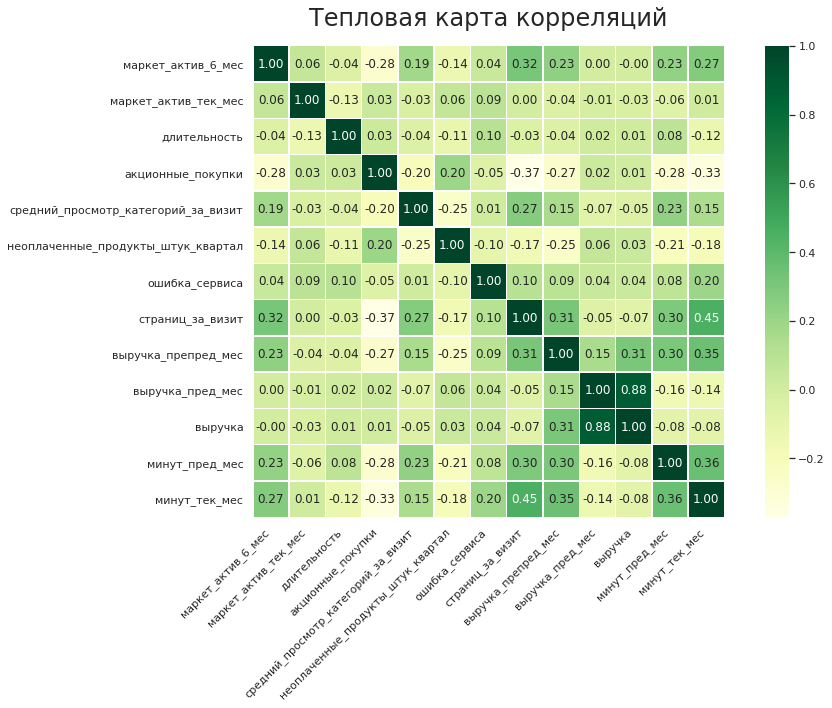

In [ ]:
plt.figure(figsize=(14, 10))

corr_matrix = market_united[market_united\
                            .select_dtypes(include=['int64', 'float64'])\
                            .columns.tolist()[1:]]\
                            .corr(method='spearman')

heatmap = sns.heatmap(
                      corr_matrix,
                      annot=True,
                      cmap='YlGn',
                      fmt='.2f',
                      linewidths=0.5,
                      square=True,
                      )

plt.title('Ч', fontsize=24, pad=20)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

Выручка за предыдущий месяц(Выручка_пред_мес) и Выручка имеют сильную зависимость, но не выше 0.9. Мультиколлениарность отсутствует.

## Использование пайплайнов

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    market_united.drop(['покупательская_активность', 'id'], axis=1),
    market_united['покупательская_активность'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = market_united['покупательская_активность'])

#кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

cat_columns = [
    'популярная_категория',
    'разрешить_сообщать'
              ]
ord_columns = [
    'тип_сервиса'
              ]
num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_препред_мес',
    'выручка_пред_мес',
    'выручка',
    'минут_пред_мес',
    'минут_тек_мес',
              ]

#пайплайны для подготовки признаков
ohe_pipe = Pipeline([
    ('simplerImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ordinal_pipe = Pipeline([
    ('simplerImputer_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['премиум', 'стандарт']],
                              handle_unknown='use_encoded_value',
                              unknown_value=-1)
                              )
])

#пайплайны для числовых признаков
standard_pipe = Pipeline([
    ('simplerImputer_standard', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])

# создание общего пайплайна для подготовки данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, cat_columns),
    ('ord', ordinal_pipe, ord_columns),
    ('num', standard_pipe, num_columns)
], remainder='passthrough')

# создание итогового пайплайна
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

#поиск оптимальной модели
param_grid = {
    'preprocessor__num__scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               SVC(probability=True, random_state=RANDOM_STATE),
               LogisticRegression(random_state=RANDOM_STATE)]
}

param_distributions = [
    #DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    #KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    #LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

#поиск лучшей модели без перебора гиперпараметров
grid_1 = GridSearchCV(
    pipe_final,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_1.fit(X_train, y_train)

# выведите параметры лучшей модели
print('Лучшая модель и её параметры без перебора гиперпараметров:\n', grid_1.best_params_)
print('ROC-AUC для этой модели:', grid_1.best_score_.round(2), '\n\n')

#поиск лучшей модели с перебором гиперпараметров
grid_2 = GridSearchCV(
    pipe_final,
    param_grid=param_distributions,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)

#обучение модели на тренировочной выборке
grid_2.fit(X_train, y_train)
print('Лучшая модель и её параметры с перебором гиперпараметров:\n', grid_2.best_params_)
print('Метрика ROC-AUC для этой модели:', grid_2.best_score_.round(2))

Лучшая модель и её параметры без перебора гиперпараметров:
 {'models': SVC(probability=True, random_state=42), 'preprocessor__num__scaler': StandardScaler()}
ROC-AUC для этой модели: 0.91 


Лучшая модель и её параметры с перебором гиперпараметров:
 {'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), 'models__C': 1, 'preprocessor__num__scaler': MinMaxScaler()}
Метрика ROC-AUC для этой модели: 0.9


In [ ]:
y_pred = grid_1.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1]).round(2)}')

Метрика ROC-AUC на тестовой выборке: 0.91


**Выводы:**  
Для оценки модели выбрали метрику ROC-AUC, так как она менее подвержена влиянию дисбаланса классов, чем многие другие метрики. Значение ROC-AUC легко интерпретируется: чем выше значение, тем лучше модель.  
Исходя из выбраного параметра: лучший результат показала модель SVC(метод опорных векторов);

## Анализ важности признаков

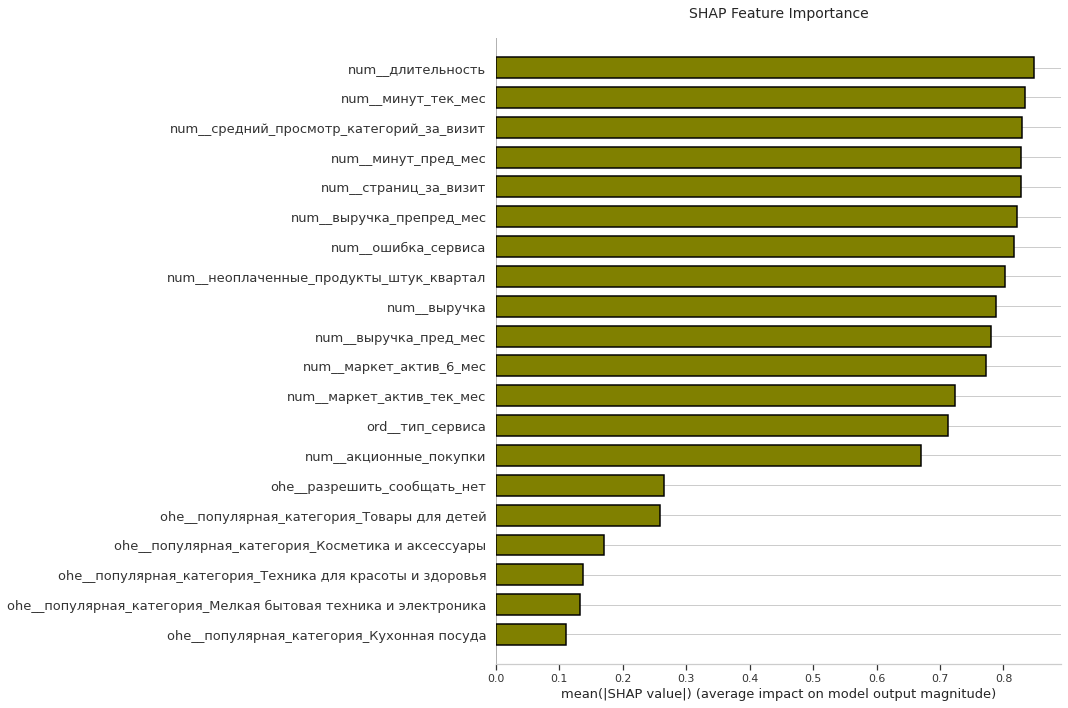

In [ ]:
X_encoded_1 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

model_1 = grid_1.best_estimator_['models'].fit(X_encoded_1, y_train)
explainer_1 = shap.PermutationExplainer(model_1, X_encoded_1)


labels_1 = pipe_final.named_steps['preprocessor'].get_feature_names_out()

shap.summary_plot(
                  X_encoded_1,
                  plot_type='bar',
                  feature_names=labels_1,
                  color='olive',
                  plot_size=(15, 10),
                  max_display=40,
                  show=False
                 )

ax = plt.gca()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.title('SHAP Feature Importance', pad=20, fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**Вывод:**  
- Важными признаками можно выделить количественные признаки и признак тип_сервиса;  
- Наименее важными являются категориальные признаки;  
- Наиболее важные признаки можно использовать для улучшения модели и в сегментации покупателей.

## Сегментация покупателей

Добавим к данным тестовой выборки вероятности пригадлежности к классу 1 и столбец с прибылью. Построим диаграммы рассеяния, чтобы выделить пороги значений для разделения покупателей на классы.

In [ ]:
X_test['вероятность_класс_1'] = y_pred[:, 1]
market_united_X_test = X_test.sort_values(by='вероятность_класс_1')

market_united_X_test = market_united_X_test.join(money['прибыль'], how='left')

market_united_X_test.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка,минут_пред_мес,минут_тек_мес,вероятность_класс_1,прибыль
485,премиум,да,4.9,3,888,0.14,Техника для красоты и здоровья,3,1,6,9,5268.0,4698.0,4893.0,18,15,0.016490,5.95
695,премиум,да,3.9,4,572,0.14,Мелкая бытовая техника и электроника,4,2,2,6,5194.0,6262.0,5696.5,18,16,0.020425,3.95
1113,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,5180.0,5917.6,5505.5,15,18,0.021465,2.03
453,стандарт,нет,4.1,4,808,0.15,Мелкая бытовая техника и электроника,4,2,3,13,4691.0,4746.1,4126.0,16,12,0.021675,4.48
1060,стандарт,да,5.5,3,847,0.11,Мелкая бытовая техника и электроника,5,1,5,4,5233.0,5351.8,5227.0,16,14,0.022551,4.14
473,премиум,да,4.3,4,951,0.20,Домашний текстиль,3,3,4,10,5053.0,5202.6,5063.5,15,17,0.022846,4.51
885,стандарт,да,4.1,4,551,0.21,Мелкая бытовая техника и электроника,4,1,4,10,4607.0,5171.0,4839.5,13,17,0.023281,4.04
517,стандарт,да,5.4,4,559,0.17,Домашний текстиль,5,5,5,12,4370.0,5611.6,4965.5,19,16,0.028306,4.10
764,стандарт,нет,5.3,3,660,0.19,Товары для детей,4,1,2,6,4907.0,5067.8,5138.0,20,15,0.028642,3.85
983,премиум,да,4.8,3,616,0.16,Техника для красоты и здоровья,3,2,2,11,5474.0,5581.9,5305.0,22,16,0.029256,3.84


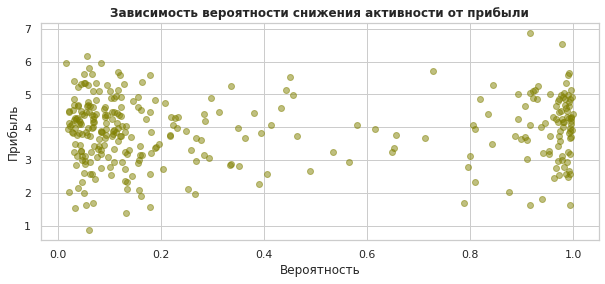

In [ ]:
plt.figure(figsize=(10, 4))
plt.title(f'Зависимость вероятности снижения активности от прибыли', fontweight='bold')
plt.xlabel('Вероятность')
plt.ylabel('Прибыль')
plt.scatter(
            x=market_united_X_test['вероятность_класс_1'],
            y=market_united_X_test['прибыль'],
            alpha=0.5,
            c='olive'
            )


Из диаграммы видим, что прибыль распределена среди пользователей с высокой вероятностью, так же как и среди пользователей с низкой. Сделать какие-то выводы трудно.  
Построим диаграммы зависимости вероятности снижения активности от наиболее важных признаков.

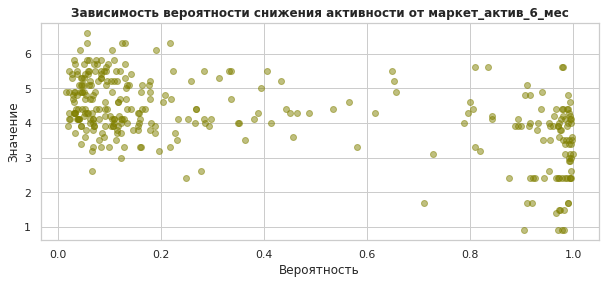

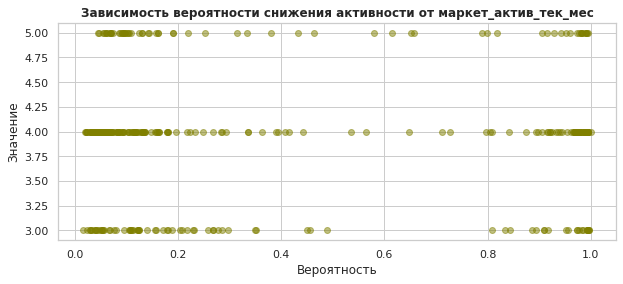

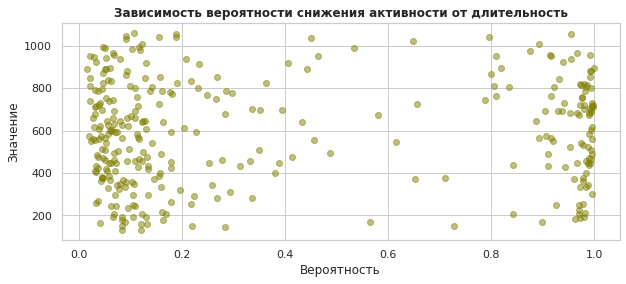

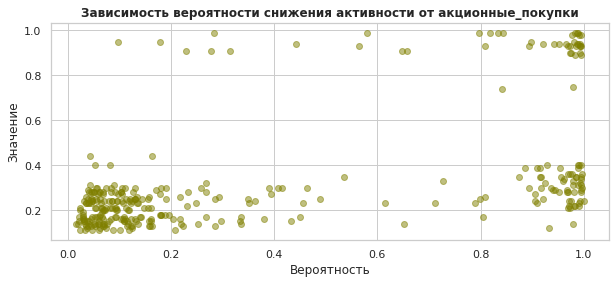

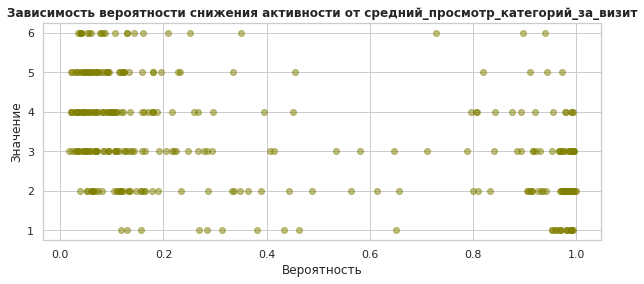

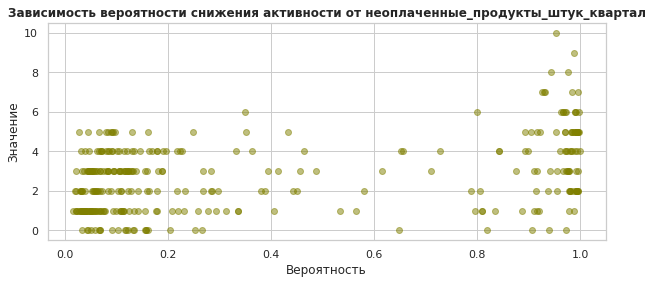

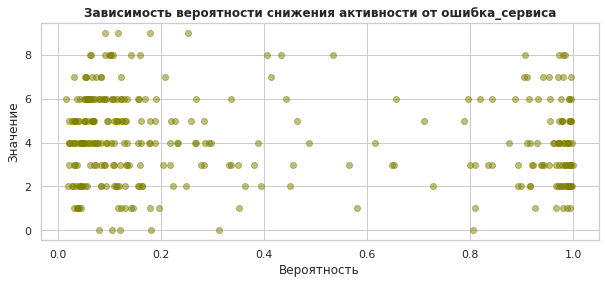

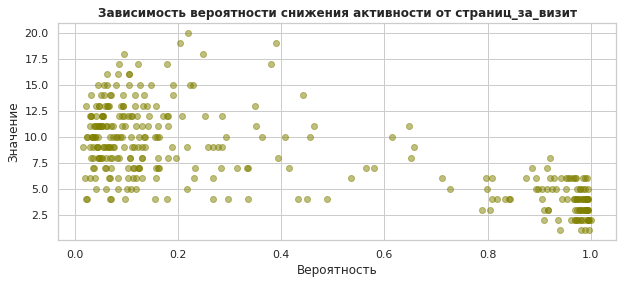

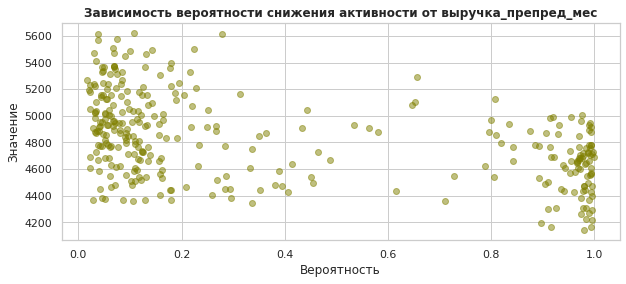

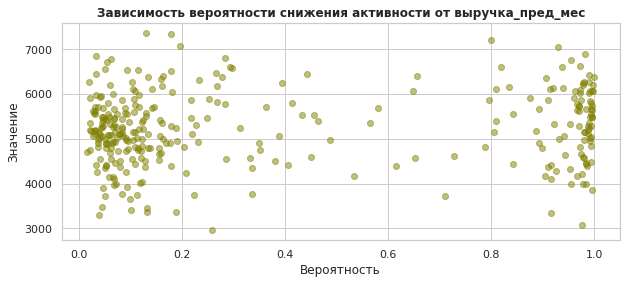

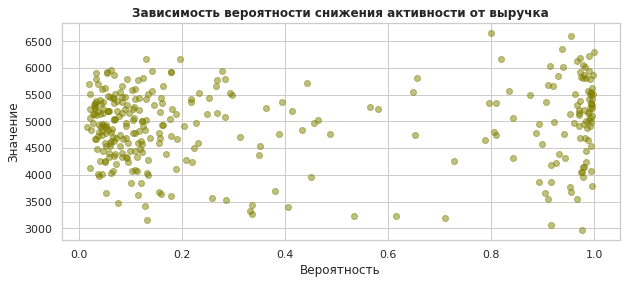

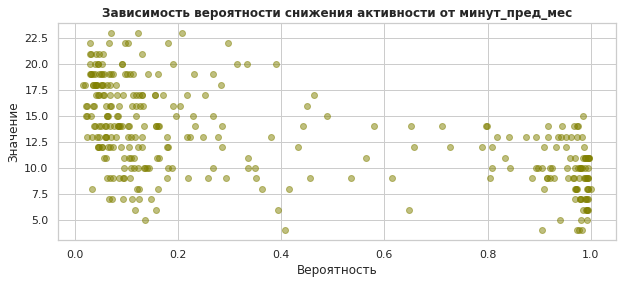

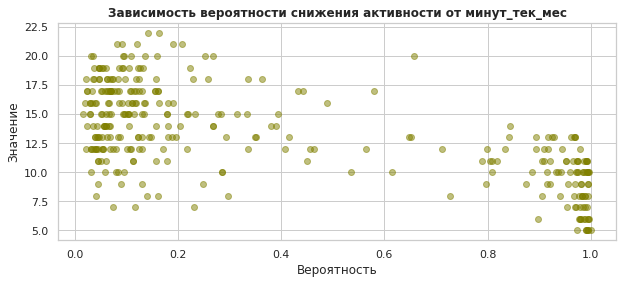

In [ ]:
for column in num_columns:
    plt.figure(figsize=(10, 4))
    plt.title(f'Зависимость вероятности снижения активности от {column}', fontweight='bold')
    plt.xlabel('Вероятность')
    plt.ylabel('Значение')
    plt.scatter(
                x=market_united_X_test['вероятность_класс_1'],
                y=market_united_X_test[column],
                alpha=0.5,
                c='olive'
                )

Из этих графиков можно сделать 3 наблюдения, относительно пользователей с высокой вероятностью снижения активности:
- Среди них есть некоторое количество пользователей имеющих высокую акционную активность, выше 0,6;  
- В эту категорию попадают и те кто проявлял слабую активность за 6 месяцев, а именно менее 3;
- Так же имеется некоторое количество пользователей имеющих неоплаченные покупки в количестве более 6 штук.  
  
Стоит подробнее рассмотреть сегмент пользователей покупающих по акции с активностью выше 0,6 и имеющих при этом товары в корзине. Эти условия описывают покупателей которые пользуются только акциями и могут ожидать акции на тот или иной товар, сохранив его в корзину.

In [ ]:
market_united = market_united.join(money['прибыль'], how='left')
market_united_segment = market_united.query('акционные_покупки > 0.8 and неоплаченные_продукты_штук_квартал > 0')

market_united_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 3 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   150 non-null    int64  
 1   покупательская_активность            150 non-null    object 
 2   тип_сервиса                          150 non-null    object 
 3   разрешить_сообщать                   150 non-null    object 
 4   маркет_актив_6_мес                   150 non-null    float64
 5   маркет_актив_тек_мес                 150 non-null    int64  
 6   длительность                         150 non-null    int64  
 7   акционные_покупки                    150 non-null    float64
 8   популярная_категория                 150 non-null    object 
 9   средний_просмотр_категорий_за_визит  150 non-null    int64  
 10  неоплаченные_продукты_штук_квартал   150 non-null    int64  
 11  ошибка_сервиса                 

<center><strong>маркет_актив_6_мес</strong></center>

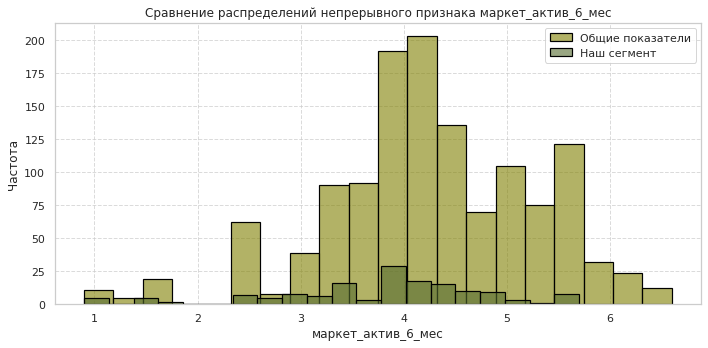

<center><strong>маркет_актив_тек_мес</strong></center>

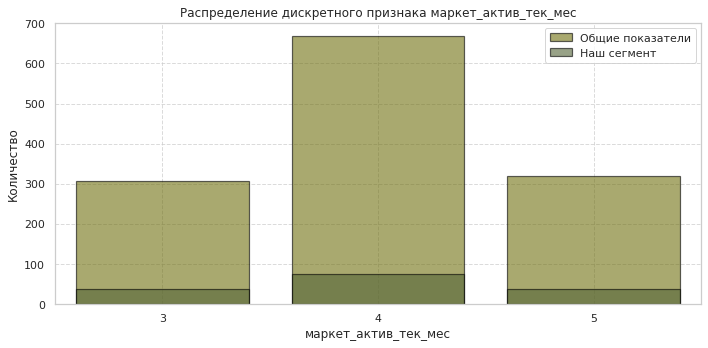

<center><strong>длительность</strong></center>

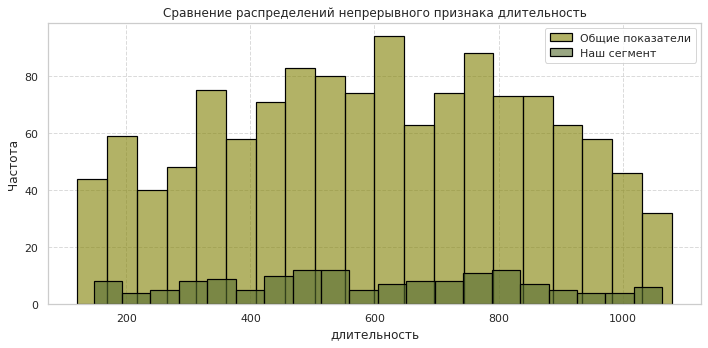

<center><strong>акционные_покупки</strong></center>

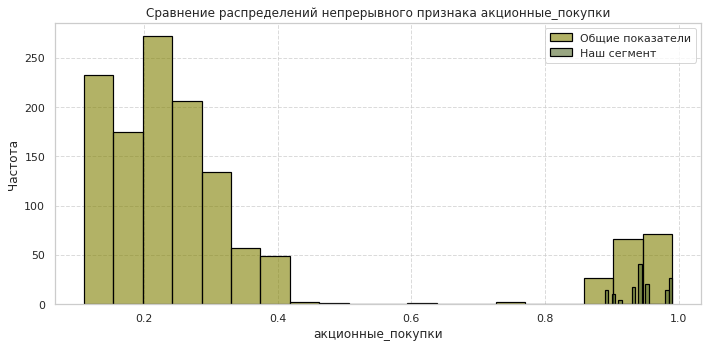

<center><strong>средний_просмотр_категорий_за_визит</strong></center>

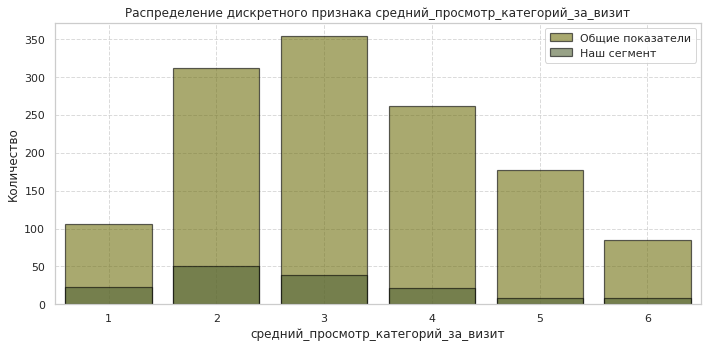

<center><strong>неоплаченные_продукты_штук_квартал</strong></center>

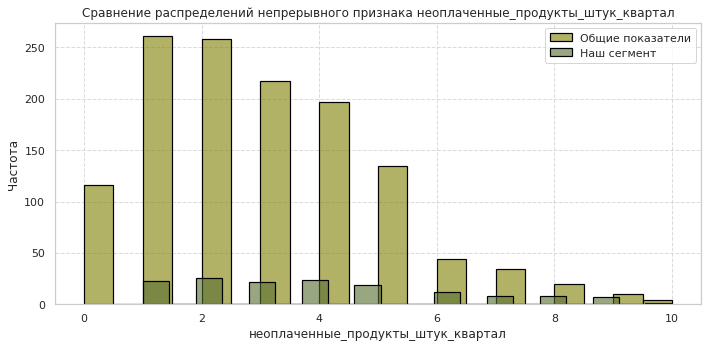

<center><strong>ошибка_сервиса</strong></center>

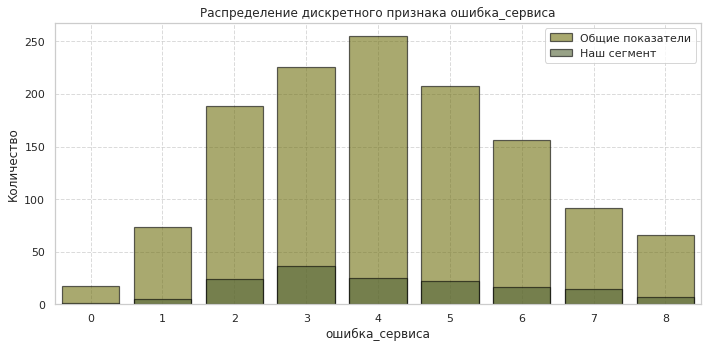

<center><strong>страниц_за_визит</strong></center>

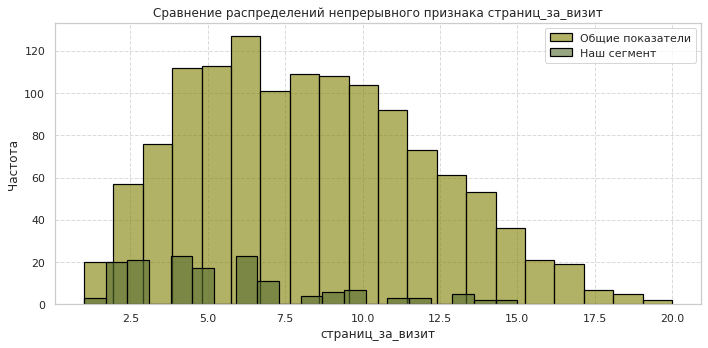

<center><strong>выручка_препред_мес</strong></center>

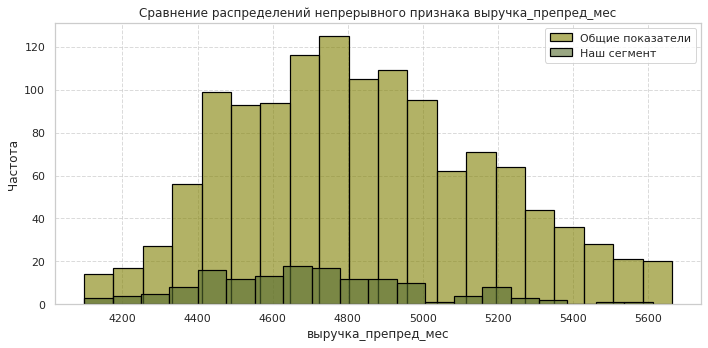

<center><strong>выручка_пред_мес</strong></center>

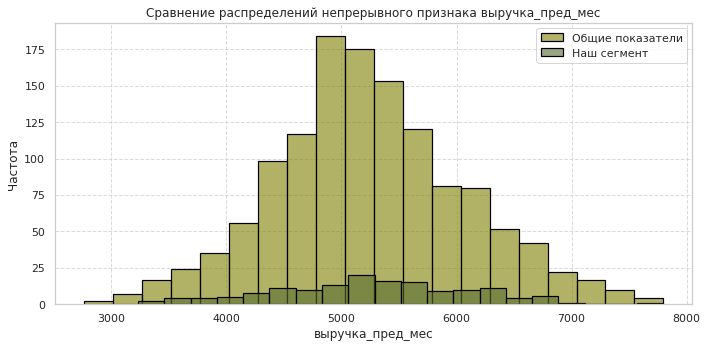

<center><strong>выручка</strong></center>

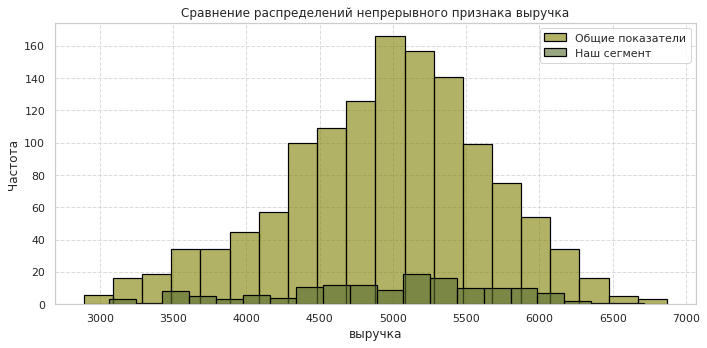

<center><strong>минут_пред_мес</strong></center>

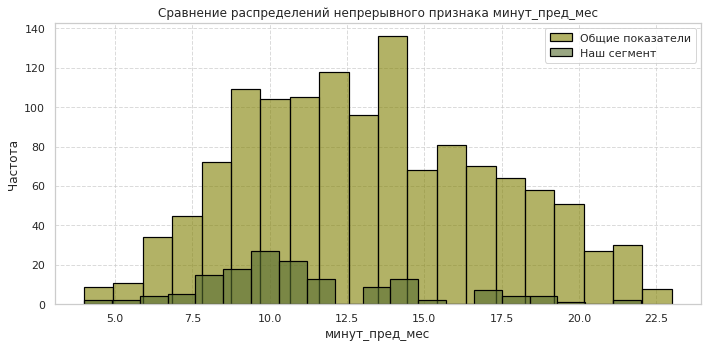

<center><strong>минут_тек_мес</strong></center>

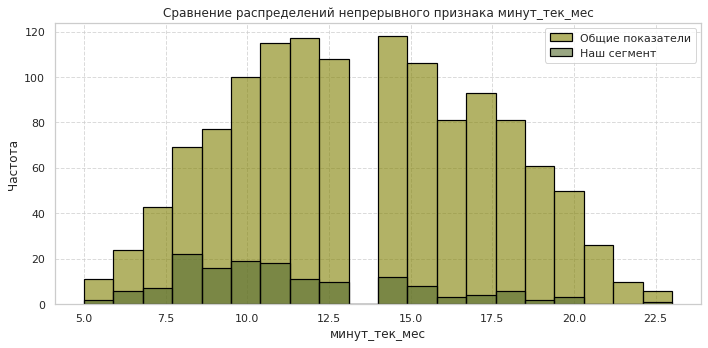

<center><strong>прибыль</strong></center>

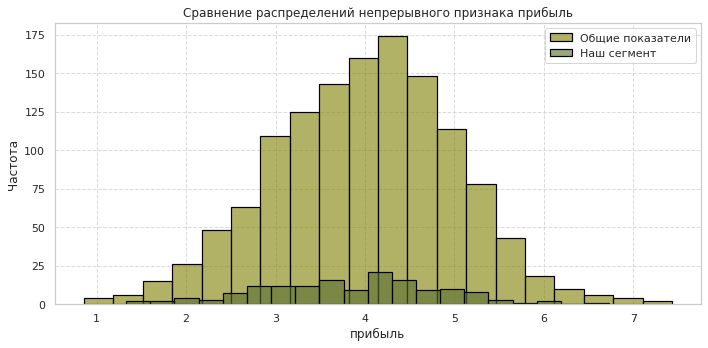

In [ ]:
for column in market_united.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:

    display(Markdown(f"<center><strong>{column}</strong></center>"))

    sns.set(rc={"figure.figsize": (10, 5)}, style="whitegrid")
    fig, ax = plt.subplots()

    if market_united[column].nunique() <= 10:
            #используем countplot
        sns.countplot(
                    x=column,
                    data=market_united,
                    color='olive',
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.6,
                    label='Общие показатели'
                    )

        sns.countplot(
                    x=column,
                    data=market_united_segment,
                    color='#556B2F',
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.6,
                    label='Наш сегмент'
                    )

        ax.set(
                    ylabel='Количество',
                    xlabel=column,
                    title=f'Распределение дискретного признака {column}'
                    )

    else:
            #используем histplot
        sns.histplot(
                    market_united[column],
                    bins=20,
                    color='olive',
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.6,
                    label='Общие показатели'
                    )

        sns.histplot(
                    market_united_segment[column],
                    bins=20,
                    color='#556B2F',
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.6,
                    label='Наш сегмент'
                    )

        ax.set(
                    ylabel='Частота',
                    xlabel=column,
                    title=f'Сравнение распределений непрерывного признака {column}'
                    )

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    plt.tight_layout()
    plt.show()



Из графиков видно, что пользователи из данного сегмента меньше проводят времени на сайте, меньше просматривают страниц и заинтересованы чаще всего в 2-3 категориях.  
Проверим распределение категорианальных признаков.

<center><strong>покупательская_активность</strong></center>

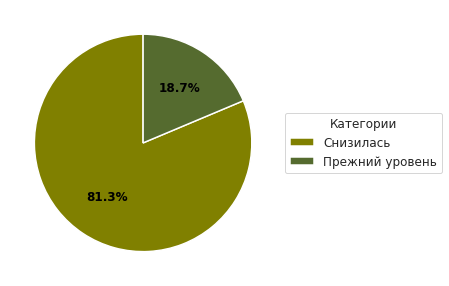

<center><strong>тип_сервиса</strong></center>

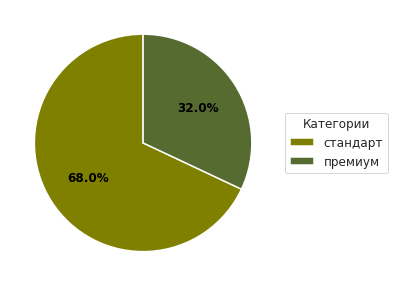

<center><strong>разрешить_сообщать</strong></center>

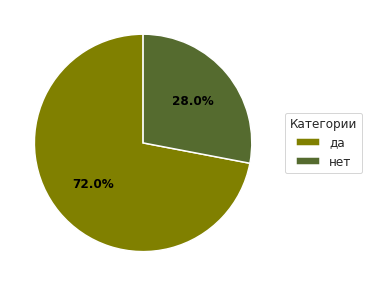

<center><strong>популярная_категория</strong></center>

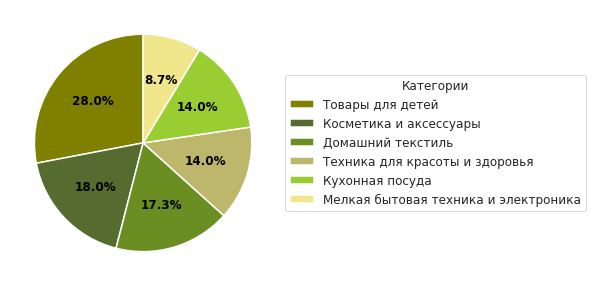

In [ ]:
pie_chart(market_united_segment)

Здесь видим, что в большинстве случаев пользователей из нашего сегмента интересуют товары для детей. Чуть менее популярны, но всеже обладают внушительной долей, косметика и аксессуары и домашний текстиль.

## Общий вывод

В ходе выполнения исследования были проделаны следующие шаги и получены соответствующие результаты:
    
**Загрузра и изучение данных показало:**  
   - Пропуски в таблицах отсутствуют.  
   - Типы данных в столбцах соответствуют их наполнению.  
   - Названия столбцов не везде имеют одинаковый вид в соответствии со "змеиным регистром".  

**Предобработка данных выполнена:**  
   - Полных дубликатов нет.
   - Найден и исправлен неявный дубликат.  
   - Исправлены 2 опечатки в названиях категорий.  
   
**Исследовательский анализ:**
  
  Отобрали активных последние 3 месяца пользователей.
  
  Анализ датафреймов показал следующее:  
  
market_file:  
  - **Маркет_актив_6 мес** имеет ненормальное распределение, есть небольшая группа малых значений;
  - **Маркет_актив_тек_мес** выглядит как категориальный признак;
  - **Длительность** имеет ненормальное распределение;
  - **Акционные_покупки** имеет бимодальное распределение - в области от 0 до 0,4 и в области от 0,8 до 1. Так же можно заметить, что сущетвуют покупатели, которые покупают только оп акции;
  - **Средний_просмотр_категорий_за_визит** имеет ненормальное распределение;
  - **Неоплаченные_продукты_штук_квартал** имеет смещенное влево ненормальное распределение;
  - **Ошибки_сервиса** имеет ненормальное распределение;
  - **Страниц_за_визит** имеет смещенное влево ненормальное распределение;
  - Категорианальные признаки несбалансированы.  
  
market_money  
  - **Выручка** имееет ненормальное распределение, аномальное значение удалено;
  
market_time  
  - **Минут** имеет неормальное распределение, смещенное влево;
  
money  
  - **Прибыль** имееет нормальное распределение, смещенное вправо;
  
**Объединили таблицы и добавили дополнительные столбцы за разные периоды**
  
**Корреляционный анализ показал:**
  
  Выручка за предыдущий месяц(Выручка_пред) и Выручка имеют сильную зависимость, но не выше 0.9. Мультиколлениарность отсутствует.  
  
**Использовали пайплайн выбрав лучшую модель и метрику для ее оценки**  
  
**Выделили наиболее и наименее важные признаки**  
  
**Произвели сегментацию и выбрали наиболее выраженый сегмент**  
  
  Опираясь на результат проделанной работы можно подвести следующий итог и дать рекомендации:  
  
  Был выбран сегмент пользователей покупающих по акции с активностью выше 0,6 и имеющих при этом товары в корзине. Эти условия описывают покупателей которые пользуются только акциями и могут ожидать акции на тот или иной товар, сохранив его в корзину.  
  ***Я бы порекомендовал, добавить оповещения на акции для товаров находящихся в корзине и на акции для схожих с ними товаров.***  
  
  Так же выяснилось, что пользователи из данного сегмента меньше проводят времени на сайте, меньше просматривают страниц и заинтересованы чаще всего в 2-3 категориях.  
  ***Отсюда следует дополнительная к первой рекомендация - помимо опоещения улучшить таргет транслируемых на главной странице товаров для этого пользователя индивидуально, а так же разместить в рекомендациях на всех страницах сайта и попытаться увеличить объем информации с рекомендациями.***  
  
  Провели анализ категориальных признаков для сегмента и выснили, что в большинстве случаев пользователей из нашего сегмента интересуют товары для детей. Чуть менее популярны, но всеже обладают внушительной долей, косметика и аксессуары и домашний текстиль.  
  ***Что говорит о том, что так же пользователям стоит чаще предлагать акционные товары из категории "товары для детей".***